<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 16 - Sequential decision making: Tabular Q-learning & DQN

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 15.1 [2 Points] Theory Review

## 15.1.1 [1 Point] Reinforcement Learning

- What are the main differences between RL and Planning algorithms? Given action value function $Q^*(s,a)$, what is the optimal policy $\pi^*(a|s) ~ \forall s,a$?
- Các điểm khác biệt chính giữa các giải thuật AI học-tăng-cường (học điều khiển, học ra quyết định) và lên kế hoạch? Từ hàm giá trị $Q^*(s,a)$ tìm hàm ra quyết định tối ưu $\pi^*(a|s) ~ \forall s,a$ ra sao?


Điểm khác biệt: 
Planning : T,R được cho trước
. RL : Không biết T và R

Tối ưu :$\pi^*(a|s)$ = argmax$Q^*(s,a)$



## 15.1.2 [1 Point] Q-Learning

- Write down update equation of Q-learning and compare it with planning by Dynamic Programming: what are the main differences? What is the policy $\pi(a|s)$ the agent follows while learning from interactions in Q-learning?
- Viết phương trình cập nhật (học) tham số trong Q-learning, so với phương trình lên kế hoạch bằng quy-hoạch-động (DP) có gì khác? Hàm ra quyết định $\pi(a|s)$ mà AI thực hiện khi học tương tác trong Q-learning là gì?

Phương trình cập nhật : 

$$
\hat{Q}(s_t,a_t) = \hat{Q}(s_t,a_t) - \eta*\Delta{Q} \\
= \hat{Q}(s_t,a_t) +\eta[r_t + \gamma max_{a_{t+1}}(Q(s_{t+1},a_{t+1})) - \hat{Q}(s_t,a_t)]
$$

MDP xác định trạng thái của môi trường, hành động mà tác nhân có thể thực hiện, phần thưởng và kỳ vọng của nó với hành động và trạng thái tiếp theo. Q- learning là một thuật toán để học chính sách dẫn đến lợi nhuận tối ưu khi tác nhân hoạt động trong một môi trường


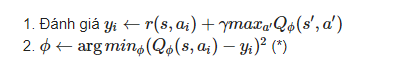

# 15.2 [4 Points] Coding Practice

## 15.2.1 [1 Point] Khởi tạo và tìm hiểu Environment

**Giới thiệu environment**

https://gym.openai.com/envs/Taxi-v3/

https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

In [ ]:
# Tham khảo: 
import gym 

env = gym.make("Taxi-v3").env

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### TODO: Các chữ trên bản đồ có ý nghĩa gì?

### TODO: Màu tím hồng và chữ màu xanh dương nghĩa là gì?


Các chữ trên bản đồ là destinations.
Màu tím hồng : Vị trí hiện tại của taxi
Blue : Vị trí hiện tại của passenger


In [ ]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


### TODO: Có tất cả 6 hành động khả dĩ (action). Đó là những hành động nào?



    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger

## 15.2.2 [3 Points] Training and Evaluating

**Đọc source code bên dưới và hoàn thành tất cả phần #TODO**




In [ ]:
import numpy as np
# TODO: Khởi tạo q_table
q_table = np.zeros(shape = (500,6))

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            # TODO: Explore action space
            action = env.action_space.sample()
        else:
            # TODO: Exploit learned values
            action = np.argmax(q_table[state])

        # TODO: interact with env
        next_state, reward, done, info = env.step(action)
        
        old_value = q_table[state,action]

        # TODO: calculate target
        next_max = max(q_table[next_state])
        
        # TODO: calculate new value for current q table cell
        new_value = old_value + alpha*(reward + gamma*next_max - old_value)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 43.3 s, sys: 9.89 s, total: 53.1 s
Wall time: 44.9 s


In [ ]:
# Evaluate agent's performance after Q-learning
# TODO:
# - Run for 100 episodes
# - Calculate average epochs (timesteps) per episode
# - Calculate average penalties per episode

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        # TODO: choose best action
        action = np.argmax(q_table[state])
        # TODO: interact with env
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.95
Average penalties per episode: 0.0


In [ ]:
# TODO:
# Implement algorithm again where:
# - Initial value of epsilon is 0.9
# - Epsilon value is decayed every 100 episodes
# - Min value of epsilon is 0.1
alpha = 0.1
gamma = 0.6

epsilon =0.9
# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()
    if i/101 in [i for i in range(100)] :
        epsilon = max(0.1,epsilon-0.001)

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            # TODO: Explore action space
            action = env.action_space.sample()
        else:
            # TODO: Exploit learned values
            action = np.argmax(q_table[state])

        # TODO: interact with env
        next_state, reward, done, info = env.step(action)
        
        old_value = q_table[state,action]

        # TODO: calculate target
        next_max = max(q_table[next_state])
        
        # TODO: calculate new value for current q table cell
        new_value = old_value + alpha*(reward + gamma*next_max - old_value)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



In [ ]:
# TODO:
# Visualize the evaluation process
# - Print the info of episode, timestamp, state, action, reward per frame
# - Should delay around 1 second between 2 frames (easy to watch)
import time

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Episode: {frame['episode']}")
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        time.sleep(1)

"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100
frames = []

for ep in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        # TODO: choose best action
        action = np.argmax(q_table[state])
        # TODO: interact with env
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

         # TODO: Put each rendered frame into dict for animation
         #       Using env.reander(mode='ansi') to generate each frame
        frames.append({
            'frame': env.render(mode = 'ansi'),
            'episode': episodes, 
            'state': state,
            'action': action,
            'reward': reward
            }
        )
        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Episode: 100
Timestep: 30
State: 271
Action: 3
Reward: -1


KeyboardInterrupt: ignored